<a href="https://colab.research.google.com/github/ebtisamasiri/T5/blob/main/Data_Visualization_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization Tutorial

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Introduction
In this tutorial, you will learn to visualize data using various plots. We will use the "Car Crashes" dataset from Seaborn, which contains information on car crashes in the United States. You will perform different types of analyses such as univariate, bivariate, and multivariate analysis.

#1. Loading the Dataset

Instructions:


*   Load the "Car Crashes" dataset from Seaborn.
*   Print the first few rows to understand the structure of the data.




In [96]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df = sns.load_dataset('car_crashes')
df.head()


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


#2. Univariate Analysis


### Histogram

Instructions:

* Create a histogram to visualize the distribution of the 'total' crashes.
* Use kde=True to add a kernel density estimate.

Explanation:
Univariate analysis involves examining the distribution of a single variable. The histogram helps visualize the frequency distribution of total crashes.

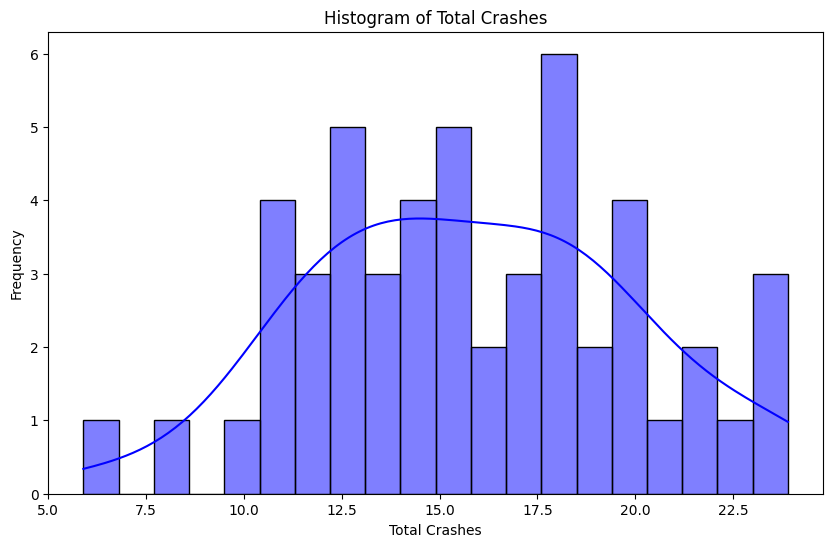

In [3]:
import matplotlib.pyplot as plt

# Histogram for total crashes
plt.figure(figsize=(10, 6))
sns.histplot(df['total'], kde=True, bins=20, color='blue')
plt.title('Histogram of Total Crashes')
plt.xlabel('Total Crashes')
plt.ylabel('Frequency')
plt.show()


###Bar Chart

Instructions:

* Create a bar chart to compare average insurance premiums by state.
* Rotate x-axis labels for better readability.

Explanation:
Bar charts are useful for comparing the average values of a single variable across different categories.

<ipython-input-4-c544e5f4119b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='abbrev', y='ins_premium', palette='muted')


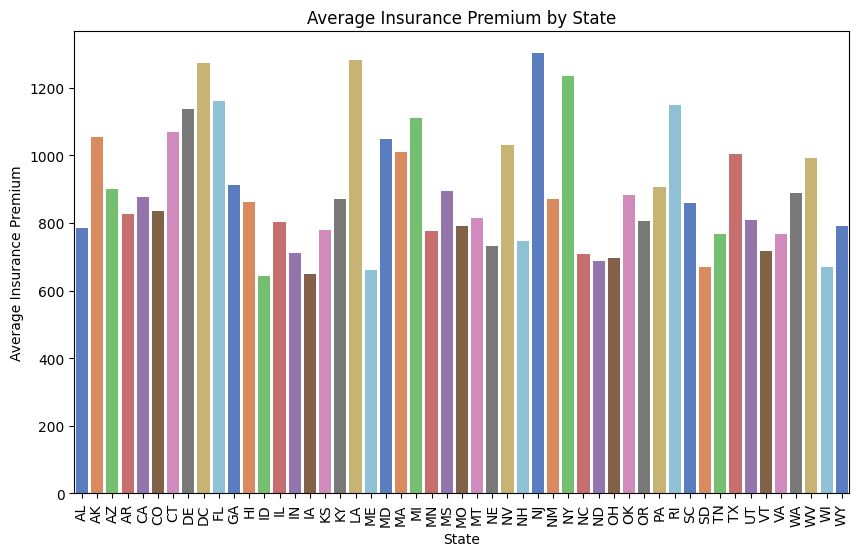

In [4]:
# Bar Chart for average insurance premium by state
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='abbrev', y='ins_premium', palette='muted')
plt.title('Average Insurance Premium by State')
plt.xlabel('State')
plt.ylabel('Average Insurance Premium')
plt.xticks(rotation=90)
plt.show()


# 3. Bivariate Analysis


###Scatter plot

Instructions:

* Create a scatter plot to visualize the relationship between 'speeding' and 'alcohol'.
* Use different colors for each state using the 'abbrev' column.

Explanation:
Bivariate analysis examines the relationship between two variables. Scatter plots help identify correlations and trends between variables.

In [46]:
df['abbrev'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

<Axes: xlabel='speeding', ylabel='alcohol'>

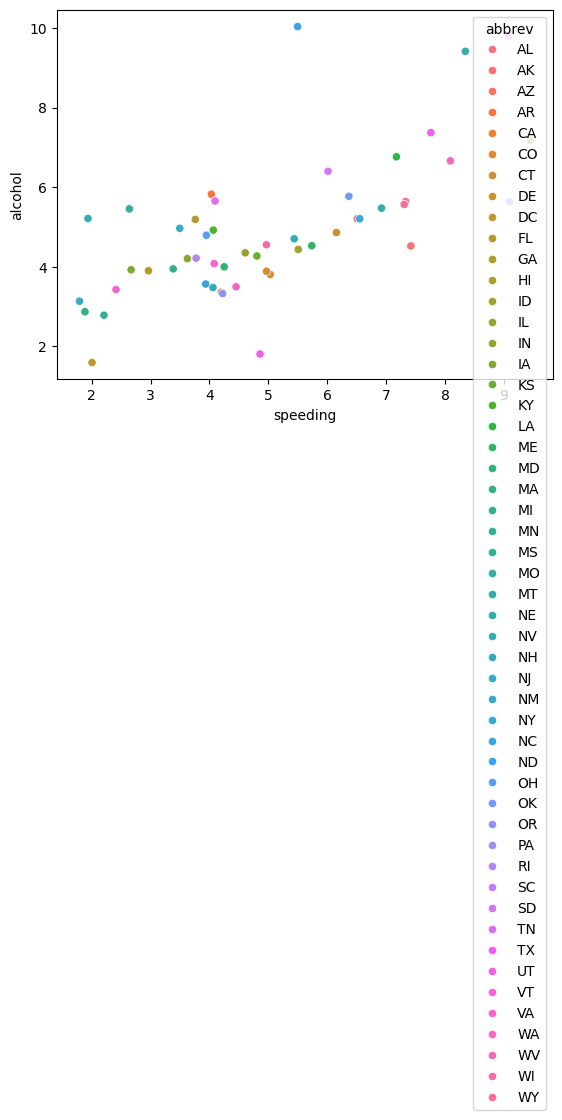

In [88]:
sns.scatterplot(x='speeding', y='alcohol', data=df, hue='abbrev')

In [ ]:
z

###HexBin

Instructions:
Create a HexBin plot to visualize the density of data points for 'speeding' and 'alcohol'.

Explanation:
HexBin plots are useful for visualizing the density of data points, especially for large datasets with overlapping points.

<Axes: xlabel='speeding', ylabel='alcohol'>

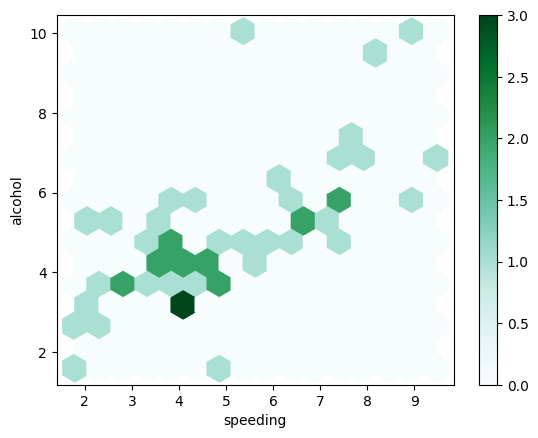

In [84]:
# Create a HexBin plot to visualize the density of data points for 'speeding' and 'alcohol'.
# write your code here
df.plot.hexbin(x = 'speeding', y = 'alcohol', gridsize= 15)

#4. Multivariate Analysis


###Heatmap

Instructions:

* Calculate the correlation matrix for the dataset.
* Create a heatmap to visualize the correlations between variables.

Explanation:
Multivariate analysis involves examining relationships between three or more variables. Heatmaps are excellent for visualizing correlation matrices.

In [100]:
abbrev = df['abbrev']
df.drop(columns=['abbrev'], inplace=True)

<Axes: >

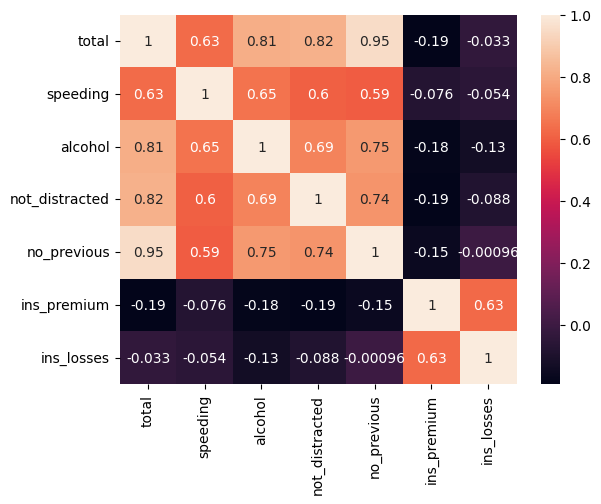

In [101]:
# # Calculate the correlation matrix for the dataset.
matrix = df.corr()
matrix
# Create a heatmap to visualize the correlations between variables.
f = (
    df.loc[:, ['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses']].applymap(lambda v: int(v)).dropna()).corr()
# Fix the indentation here:
sns.heatmap(f, annot=True)

###Pair Plot

Instructions:
Create a pair plot to visualize pairwise relationships and distributions for all numeric variables.

Explanation:
Pair plots provide a matrix of scatter plots and histograms, helping to identify relationships and distributions among multiple variables.

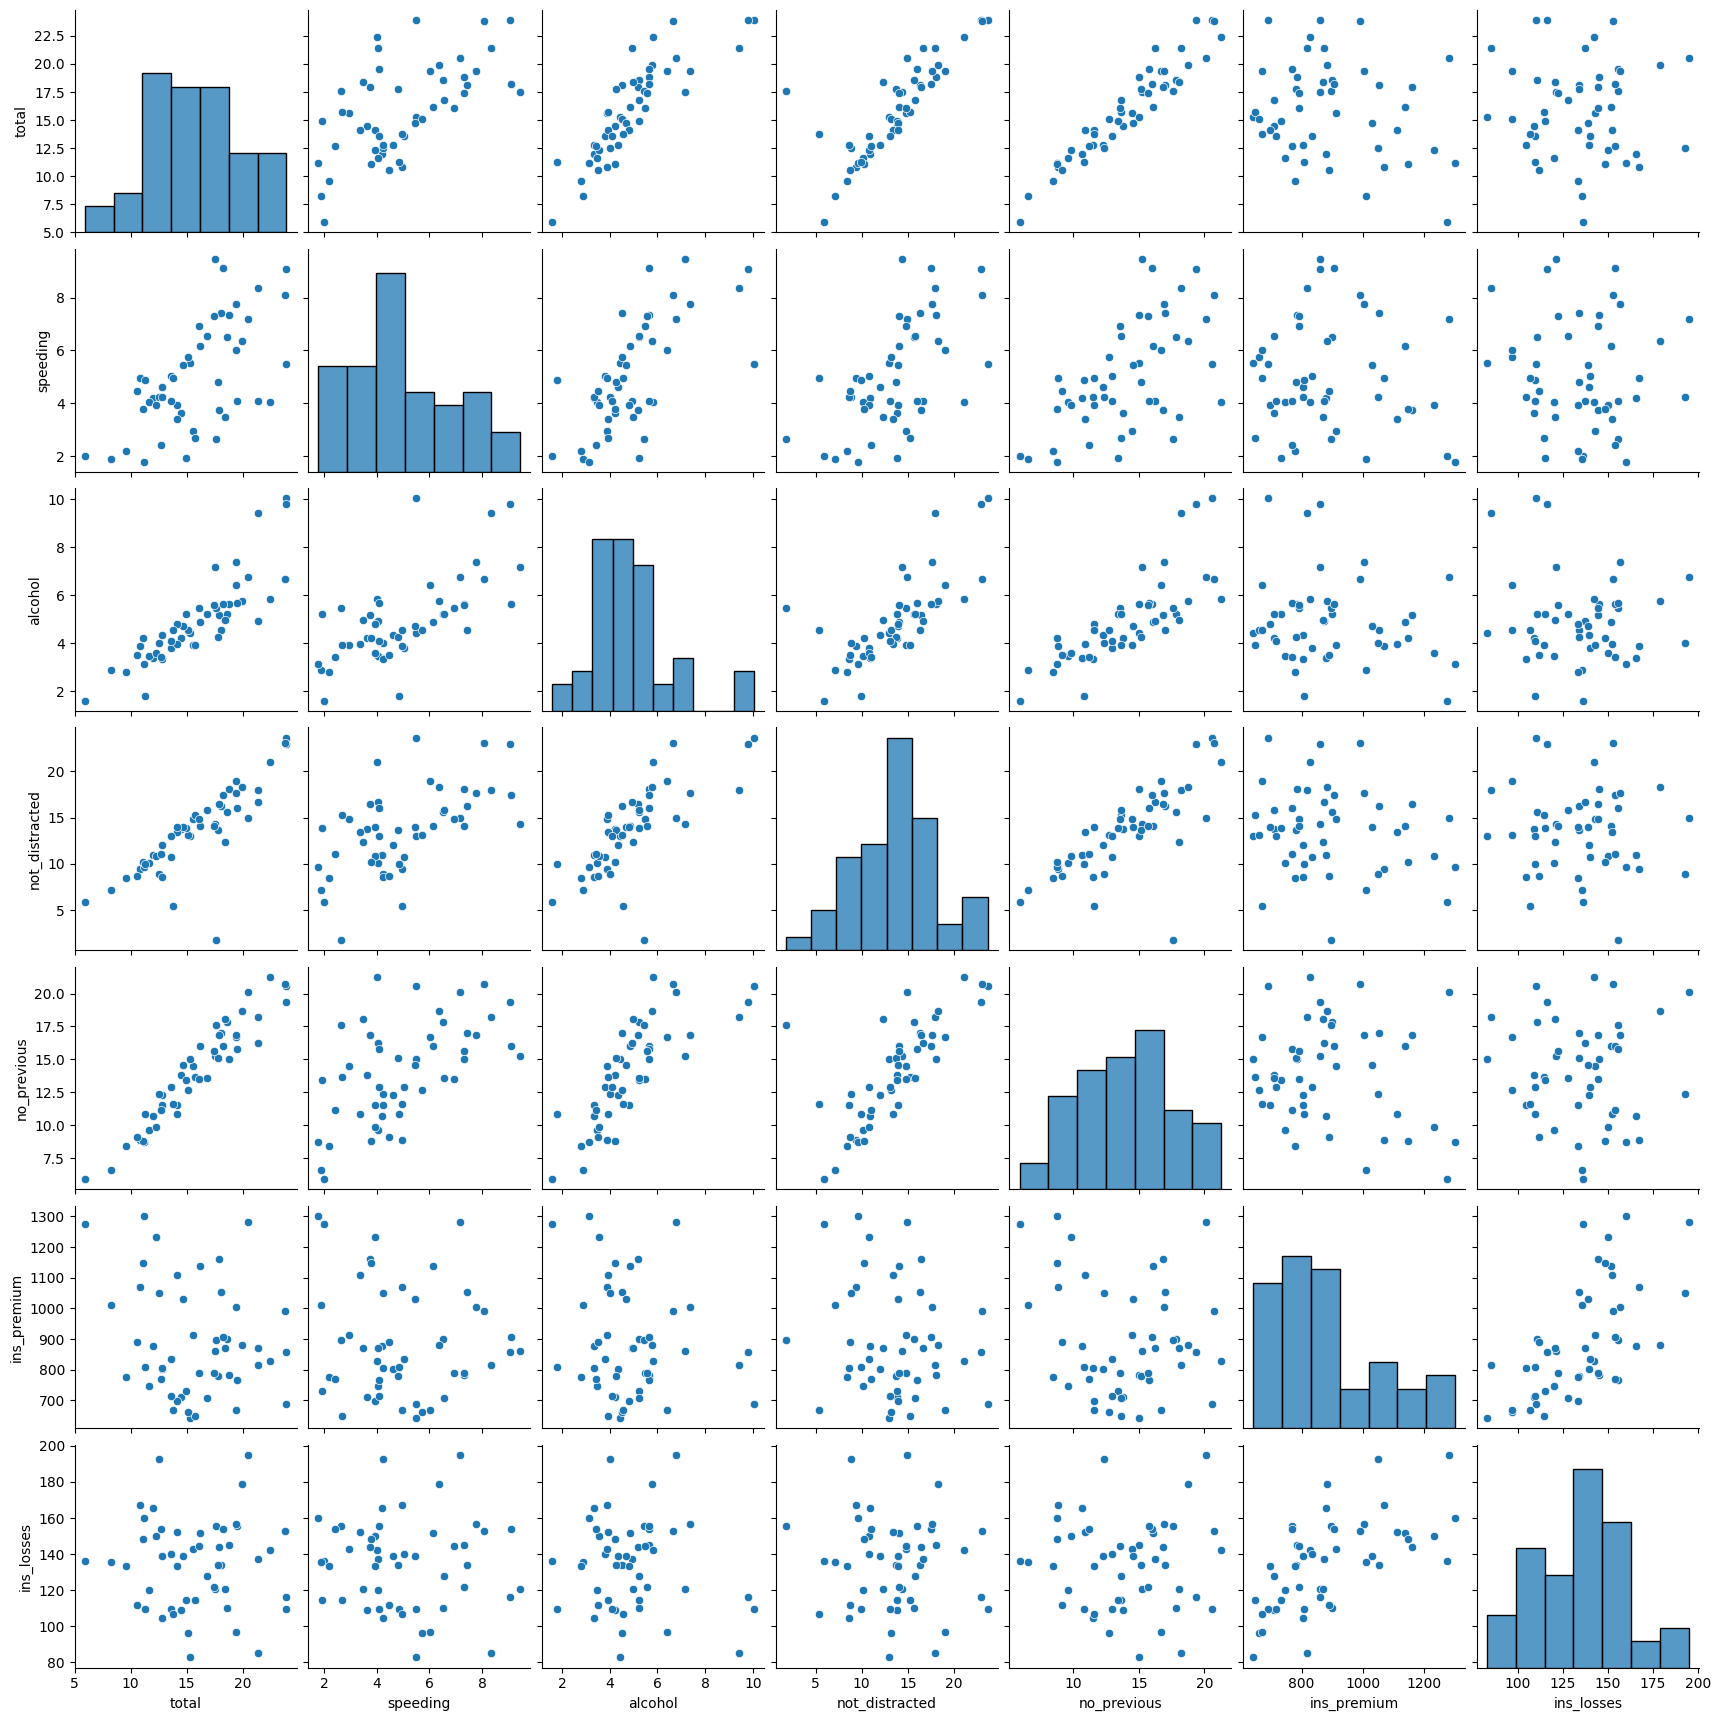

In [65]:
# Create a pair plot to visualize pairwise relationships and distributions for all numeric variables.
# write your code here
sns.pairplot(df)

#5. Special Plots


###Radar Chart
Instructions:

* Create a radar chart to compare 'speeding', 'alcohol', 'not_distracted', and 'no_previous' for a selected state.
* Use polar coordinates for the chart.

Explanation:
Radar charts are useful for comparing multiple variables across a single category.

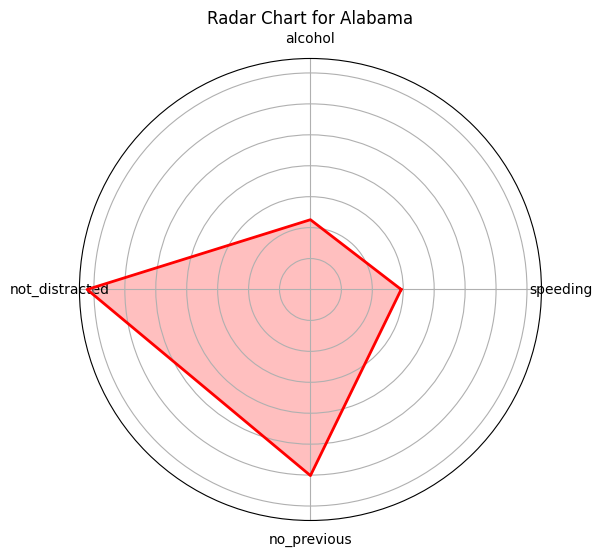

In [47]:
from math import pi

# Radar chart example
categories = ['speeding', 'alcohol', 'not_distracted', 'no_previous']
N = len(categories)

# Example data for a single state (e.g., Alabama)
values = df[df['abbrev'] == 'AL'][categories].values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Chart for Alabama')
plt.show()


###Violin Plot

Instructions:

* Create a violin plot to visualize the distribution of total crashes by state.
* Rotate x-axis labels for better readability.

Explanation:
Violin plots combine box plots and kernel density plots to show the distribution of data across different categories.

<Axes: ylabel='total'>

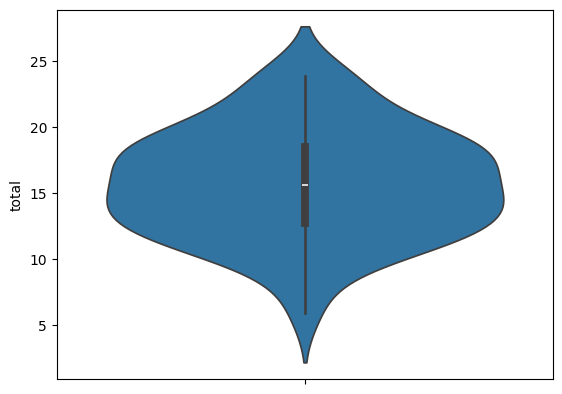

In [54]:
# Create a violin plot to visualize the distribution of total crashes by state.
# write your code here
sns.violinplot(data=df, y='total')